In [28]:
from data.data import load_data,save_data
from data.analysis.summary import summary
import matplotlib.pyplot as plt
import pandas as pd

df_01 = load_data("03")

In [29]:
summary(df_01)

Data Summary:
Number of rows: 	 	368
Number of columns: 	 	32
Total missing values: 		0 from 11776 cells
Rows with missing values: 	0
% of rows with missing values: 	0.00%
Percentage of missing values: 	0.00%


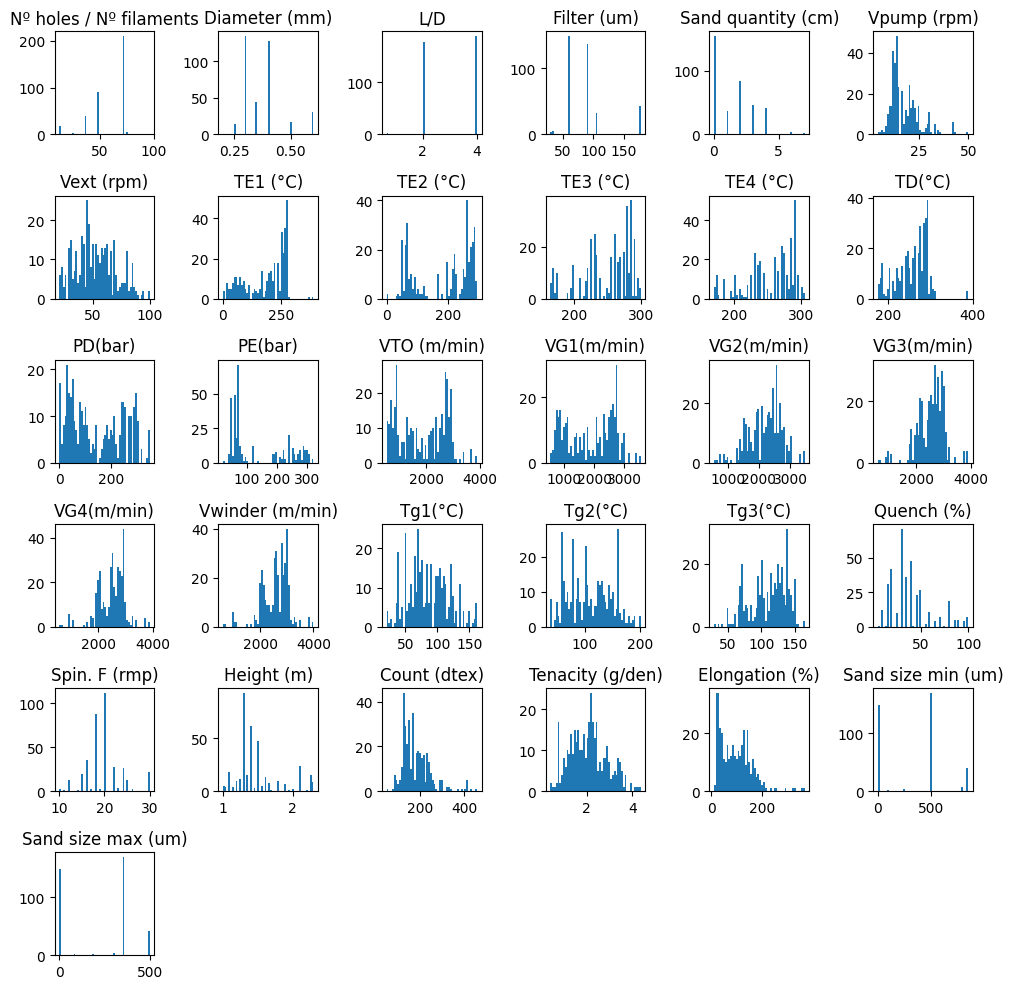

In [30]:
df_01.hist(figsize=(10, 10), bins=50, grid=False);
plt.tight_layout()

In [31]:
df_01.columns

Index(['Material', 'Nº holes / Nº filaments', 'Diameter (mm)', 'L/D',
       'Filter (um)', 'Sand quantity (cm)', 'Vpump (rpm)', 'Vext (rpm)',
       'TE1 (°C)', 'TE2 (°C)', 'TE3 (°C)', 'TE4 (°C)', 'TD(°C)', 'PD(bar)',
       'PE(bar)', 'VTO (m/min)', 'VG1(m/min)', 'VG2(m/min)', 'VG3(m/min)',
       'VG4(m/min)', 'Vwinder (m/min)', 'Tg1(°C)', 'Tg2(°C)', 'Tg3(°C)',
       'Quench (%)', 'Spin. F (rmp)', 'Height (m)', 'Count (dtex)',
       'Tenacity (g/den)', 'Elongation (%)', 'Sand size min (um)',
       'Sand size max (um)'],
      dtype='object')

In [32]:
material_groups = {}

materials = df_01["Material"].unique()

for mat_code in ["TPX","PHB","PET","PLA","PES","PP","TPE","PE","PA","PBT"]:
    selected = [imat for imat in materials if mat_code in imat]
    material_groups[mat_code] = selected
    #remove selected from materials
    materials = [imat for imat in materials if imat not in selected]

material_groups["other"] = materials

def get_material_group(material):
    for group, materials in material_groups.items():
        if material in materials:
            return group
    return "Otros"

df_01['Cluster'] = df_01['Material'].apply(get_material_group)
# lo ponemos al principio 
df_01 = df_01[['Cluster'] + [col for col in df_01.columns if col != 'Cluster']]

<Axes: xlabel='Cluster'>

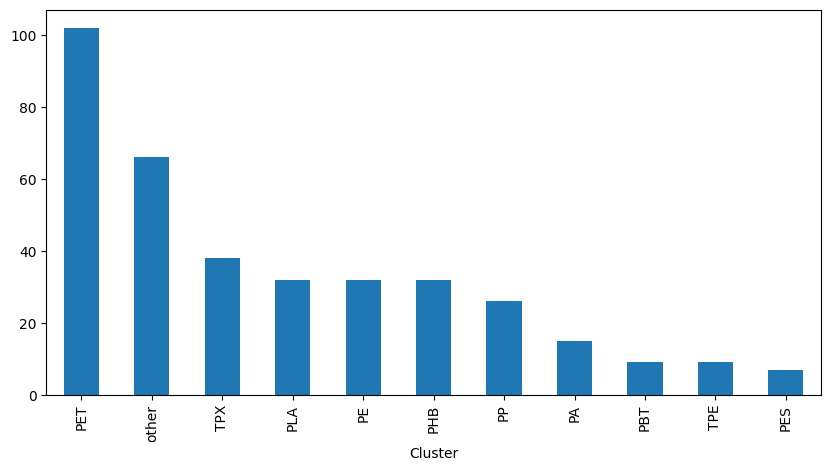

In [33]:
# count the number of materials in each group
df_01['Cluster'].value_counts().plot(kind='bar', figsize=(10, 5), grid=False)

In [34]:
map = df_01[["Material","Cluster"]].copy()

In [55]:
# unique map
map = map.drop_duplicates().reset_index(drop=True)

unique_clusters = map['Cluster'].unique()

create_json_map = { key: map[map['Cluster'] == key]['Material'].tolist() for key in unique_clusters }

max_len = max([len(v) for v in create_json_map.values()])

create_json_map = { key: v + [""] * (max_len - len(v)) for key, v in create_json_map.items() }

In [56]:
create_json_map = pd.DataFrame(create_json_map)

In [58]:
create_json_map.to_csv("map.csv", index=True)

In [35]:
df_01.pop('Material')

# remove rows Cluster == 'Other'

df_01 = df_01[df_01['Cluster'] != 'other']

<Axes: xlabel='Cluster'>

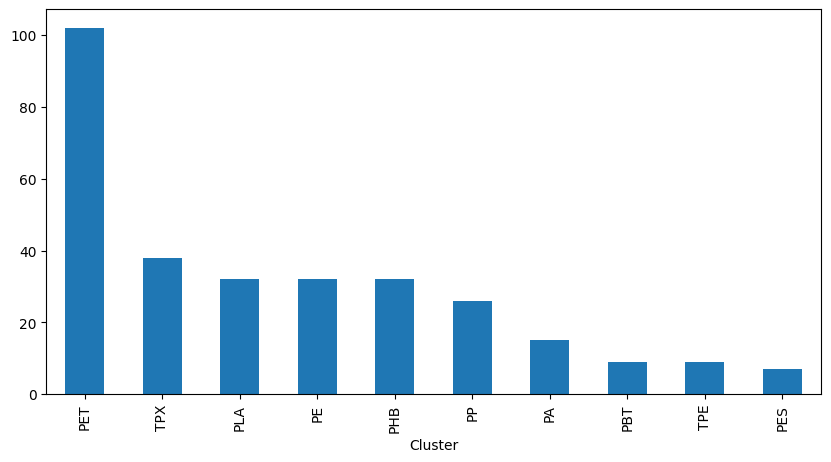

In [36]:
df_01['Cluster'].value_counts().plot(kind='bar', figsize=(10, 5), grid=False)

In [37]:
df_01

,Cluster,Nº holes / Nº filaments,Diameter (mm),L/D,Filter (um),Sand quantity (cm),Vpump (rpm),Vext (rpm),TE1 (°C),TE2 (°C),...,Tg2(°C),Tg3(°C),Quench (%),Spin. F (rmp),Height (m),Count (dtex),Tenacity (g/den),Elongation (%),Sand size min (um),Sand size max (um)
0,PET,36.0,0.4,4.0,60.0,0.0,10.0,23.9,280.0,285.0,...,110.000000,110.000000,20.0,24.0,1.40,155,0.54,44.94,0.0,0.0
1,PET,48.0,0.4,4.0,60.0,2.0,10.7,30.2,280.0,280.0,...,100.000000,80.000000,30.0,24.0,1.50,170,1.64,64.69,850.0,500.0
2,PET,48.0,0.4,4.0,60.0,2.0,10.7,30.7,280.0,280.0,...,100.000000,90.000000,30.0,24.0,1.50,160,1.67,73.79,850.0,500.0
3,PET,48.0,0.4,4.0,60.0,2.0,10.7,30.7,280.0,280.0,...,100.000000,90.000000,30.0,24.0,1.50,140,1.99,44.83,850.0,500.0
4,PLA,36.0,0.3,2.0,60.0,0.0,15.0,50.0,225.0,215.0,...,87.266649,96.441082,20.0,20.0,1.30,135,2.08,55.33,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,PLA,72.0,0.3,2.0,90.0,2.0,18.0,42.0,52.0,70.0,...,87.687097,96.578362,40.0,20.0,1.65,220,1.90,80.00,500.0,355.0
362,PET,72.0,0.3,2.0,30.0,3.0,14.0,58.7,109.3,100.0,...,161.548147,135.838222,20.0,18.0,1.30,140,2.80,140.00,500.0,355.0
363,PLA,72.0,0.3,2.0,90.0,2.0,18.0,40.0,50.0,70.0,...,87.331657,96.328305,40.0,20.0,1.65,200,1.90,90.00,500.0,355.0
364,PLA,72.0,0.3,2.0,90.0,2.0,19.5,43.0,50.0,70.0,...,88.454876,95.975856,40.0,20.0,1.65,220,1.70,95.00,500.0,355.0


In [38]:
# change name Cluster -> Material
df_01.rename(columns={'Cluster': 'Material'}, inplace=True)

In [39]:
df_01["Material"].unique()

array(['PET', 'PLA', 'PP', 'PA', 'PE', 'PES', 'PBT', 'TPX', 'PHB', 'TPE'],
      dtype=object)

In [40]:
# save 04 
save_data(df_01, "04")

Data saved to /home/djoroya/projects/DIMAT/M03_AITEX_YARN/T01-modelling/DIMAT_DATA_CLEAN_AITEX/src/data/AITEX_04.csv
